<a href="https://colab.research.google.com/github/KarynaSam/Python-DS/blob/main/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import random
from sklearn.linear_model import LinearRegression

Напишіть функцію гіпотези лінійної регресії у векторному вигляді.

In [13]:
def model(X, w):
    return np.dot(X, w)

X = np.array([[3, 7, 1], [0, 5, 2], [1, 2, 8]])
w = np.array([0, 2, 4])

h = model(X, w)
h

array([18, 18, 36])

Створіть функцію для обчислення функції втрат у векторному вигляді.

In [15]:
def loss(X, w, y):
  n = X.shape[0]
  return np.square(model(X, w) - y).sum() / (2 * n)

y = np.array([2, 6, 7])
loss(X, w, y)

206.83333333333334

Реалізуйте один крок градієнтного спуску

In [17]:
def gradient_descent_step(X, y, w, learning_rate):
    n = X.shape[0]

    # Обчислення передбачень
    predictions = model(X, w)
    # Обчислення помилок
    error = predictions - y
    # Обчислення градієнта функції втрат
    gradient = np.dot(X.T, error) / n
    # Оновлення вектора ваг
    w = w - learning_rate * gradient

    return w

learning_rate = 0.05  # Швидкість навчання (learning rate)

# Один крок градієнтного спуску
w_updated = gradient_descent_step(X, y, w, learning_rate)

print("Нові параметри:")
print(w_updated)

Нові параметри:
[-1.28333333 -1.83333333 -0.53333333]


In [24]:
def gradient_descent(X, y, w, learning_rate, num_iterations):
    losses = loss(X, w, y)
    losses_history = [losses]
    for i in range(num_iterations):
        w = gradient_descent_step(X, y, w, learning_rate)
        losses = loss(X, w, y)
        losses_history.append(losses)
    return w, losses_history

# Викликаємо функцію w_optimal з наступними параметрами X, y, w, learning_rate, и num_iterations
w_optimal, losses_history = gradient_descent(X, y, w, learning_rate, 25)

print("Найоптимальніші ваги, втрата:")
print(w_optimal, losses_history[-1])

Найоптимальніші ваги, втрата:
[-1.32568266  0.66580705  0.7797469 ] 0.34917332752621005


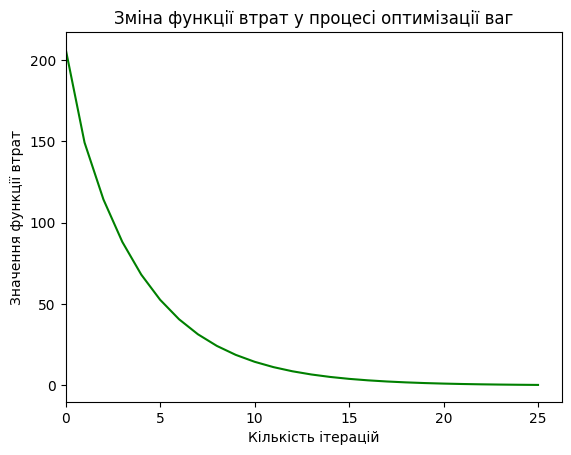

In [25]:
sns.lineplot(x=np.arange(len(losses_history)), y=[k for k in losses_history], color='green')
plt.title('Зміна функції втрат у процесі оптимізації ваг')
plt.xlabel('Кількість ітерацій')
plt.xlim(0)
plt.ylabel('Значення функції втрат')
plt.show()

Знайдіть найкращі параметри $\vec{w}$ для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень.

In [27]:
df = pd.read_csv("Housing (1).csv")
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [29]:
scaler = MinMaxScaler()

columns_to_normalize = ['area', 'bedrooms', 'bathrooms', 'price']
normalized_data = scaler.fit_transform(df[columns_to_normalize])
norm_df = pd.DataFrame(normalized_data, columns=columns_to_normalize)

norm_df.head(5)

,area,bedrooms,bathrooms,price
0,0.396564,0.6,0.333333,1.000000
1,0.502405,0.6,1.000000,0.909091
2,0.571134,0.4,0.333333,0.909091
3,0.402062,0.6,0.333333,0.906061
4,0.396564,0.6,0.000000,0.836364


In [34]:
X = np.array(norm_df[['area', 'bedrooms', 'bathrooms']])
y = np.array(norm_df['price'])
model = LinearRegression()
model.fit(X, y)
print("Найоптимальніші ваги, втрата:")
print(model.coef_)
print(model.intercept_)

Найоптимальніші ваги, втрата:
[0.47714269 0.17611257 0.36001286]
0.04282739976995403


Знайдіть ці ж параметри за допомогою аналітичного рішення

In [38]:
def cost(y: np.array, x: np.array, w: np.array) -> float:
     return np.mean((x - y) ** 2) / 2

In [39]:
theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
analytical = cost(X, y.reshape(-1, 1), theta)
res_2 = f"найкращі параметри w: {theta.flatten()}, втрати: {analytical}"
print(res_2)

найкращі параметри w: [0.51550397 0.25511989 0.34191443], втрати: 0.02073607533747462


порівняйте отримані результати.

In [41]:
print(f"Перший результат: найкращі параметри w: {model.coef_}, втрати: {model.intercept_}")
print(f"Другий результат: найкращі параметри w: {theta.flatten()}, втрати: {analytical}")
print('Плюс мінус схожі')

Перший результат: найкращі параметри w: [0.47714269 0.17611257 0.36001286], втрати: 0.04282739976995403
Другий результат: найкращі параметри w: [0.51550397 0.25511989 0.34191443], втрати: 0.02073607533747462
Плюс мінус схожі
